In [ ]:
import torch
print(torch.__version__)

2.6.0+cu124


In [ ]:
!pip install transformers

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 34.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install torchtext==0.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0

TOKENIZADOR

In [ ]:
# Paso 2: Codificar texto directamente a IDs numéricos
text = ["El gato se comió el pescado", "El perro y el gato son de mis padres", "Mañana voy a ir al veterinario para que le ponga la vacuna al gato"]
# Use the tokenizer directly with the list for batch encoding
encoded = tokenizer(text, add_special_tokens=False)  # excluye [CLS], [SEP]

print("Texto original:", text)
print("IDs numéricos:", encoded['input_ids']) # Access the encoded IDs from the BatchEncoding object

In [ ]:
from transformers import AutoTokenizer

# Paso 1: Elegir un modelo multilingüe o específico del idioma
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

# Paso 2: Codificar texto directamente a IDs numéricos
text = ["El perro"]
encoded = tokenizer(text, add_special_tokens=False)  # excluye [CLS], [SEP]

print("Texto original:", text)
print("IDs numéricos:", encoded)

print('------------------')
tokens = tokenizer(text)
ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("IDs:", ids)


Texto original: ['El perro']
IDs numéricos: {'input_ids': [[10224, 10178, 10567]], 'token_type_ids': [[0, 0, 0]], 'attention_mask': [[1, 1, 1]]}
------------------
Tokens: {'input_ids': [[101, 10224, 10178, 10567, 102]], 'token_type_ids': [[0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1]]}
IDs: [100, 100, 100]


In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('spacy','es_core_news_sm')

In [ ]:
tokens = tokenizer("Hola, colorines, cariño mío.")
print(tokens)

['Hola', ',', 'colorines', ',', 'cariño', 'mío', '.']


STOPWORDS

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('spanish'))
filtro_token = [token for token in tokens if token  not in stop_words]
print(filtro_token)

['Hola', ',', 'colorines', ',', 'cariño', '.']


STEMMING

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtro_token]
print(stemmed_tokens)

['hola', ',', 'colorin', ',', 'cariño', '.']


BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text = ['it was the best of times', 'it was the worst of times', 'it was the age of wisdom', 'it was the age of foolishness']

In [ ]:
vectorizer = CountVectorizer()
bow_encoded_titles = vectorizer.fit_transform(text)

# Extract and print the first five features
print(vectorizer.get_feature_names_out())
print(bow_encoded_titles.toarray())

['age' 'best' 'foolishness' 'it' 'of' 'the' 'times' 'was' 'wisdom' 'worst']
[[0 1 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]]


TF-IDF

Asocia un peso a cada palabra, cuanto más cercano a 1 más importante es la palabra. Cuanto más cercano a 0 menos importante es la palabra

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_encoded_titles = vectorizer.fit_transform(text)

# Extract and print the first five features
print(vectorizer.get_feature_names_out())
print(tfidf_encoded_titles.toarray()[0])

['age' 'best' 'foolishness' 'it' 'of' 'the' 'times' 'was' 'wisdom' 'worst']
[0.         0.60735961 0.         0.31694544 0.31694544 0.31694544
 0.4788493  0.31694544 0.         0.        ]


#Importar Dataset

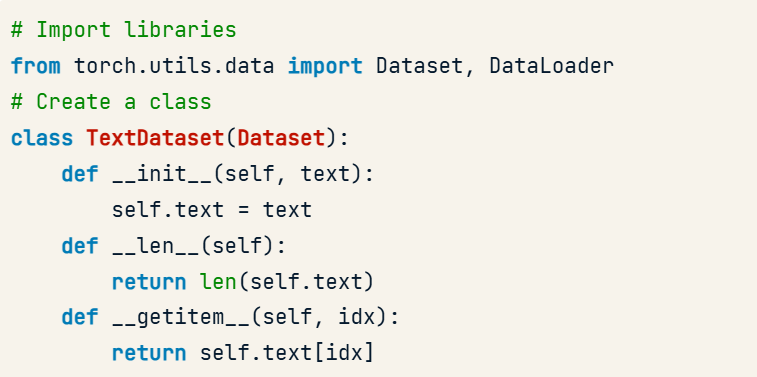

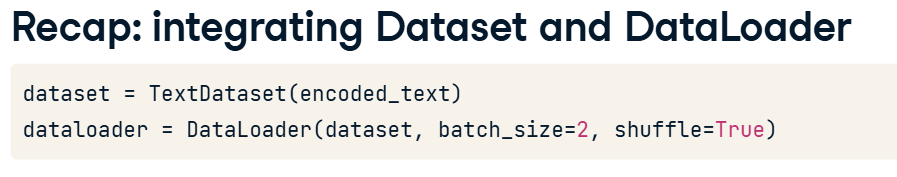

#Preprocesado de los datos

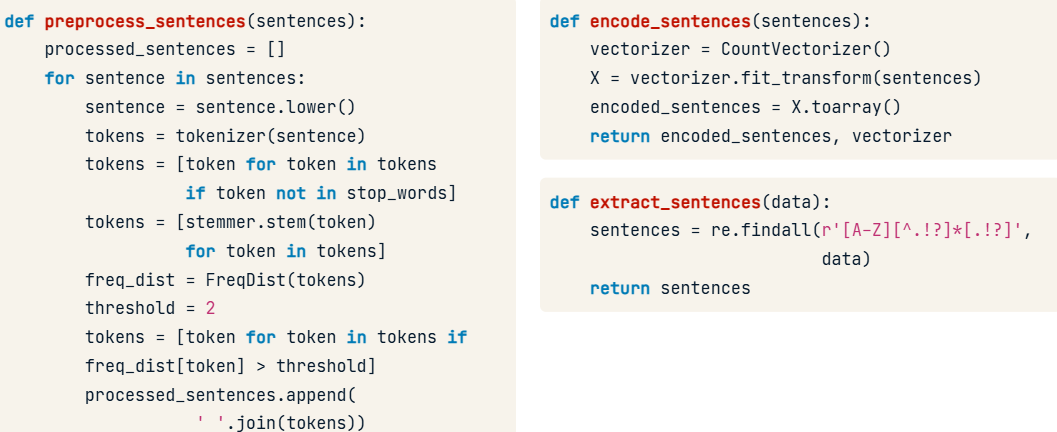

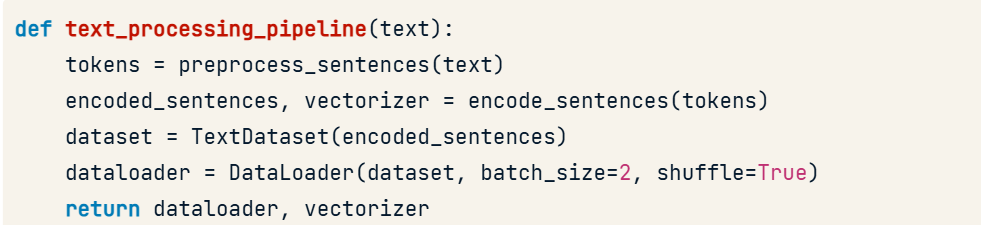

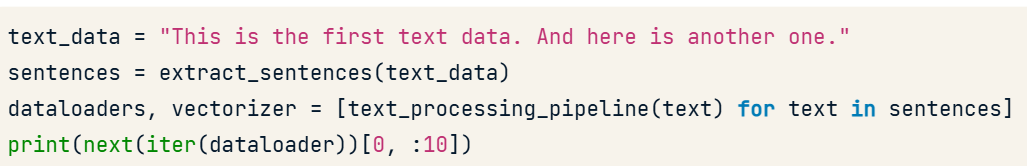

#EMBEDDINGS

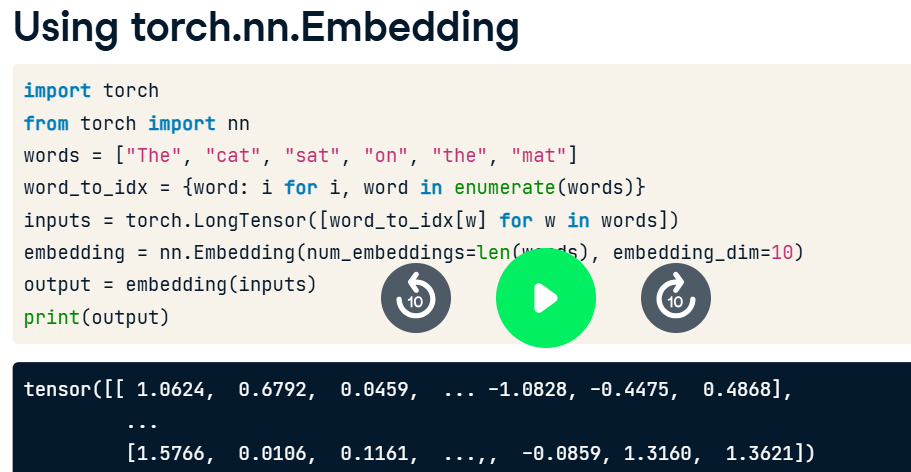

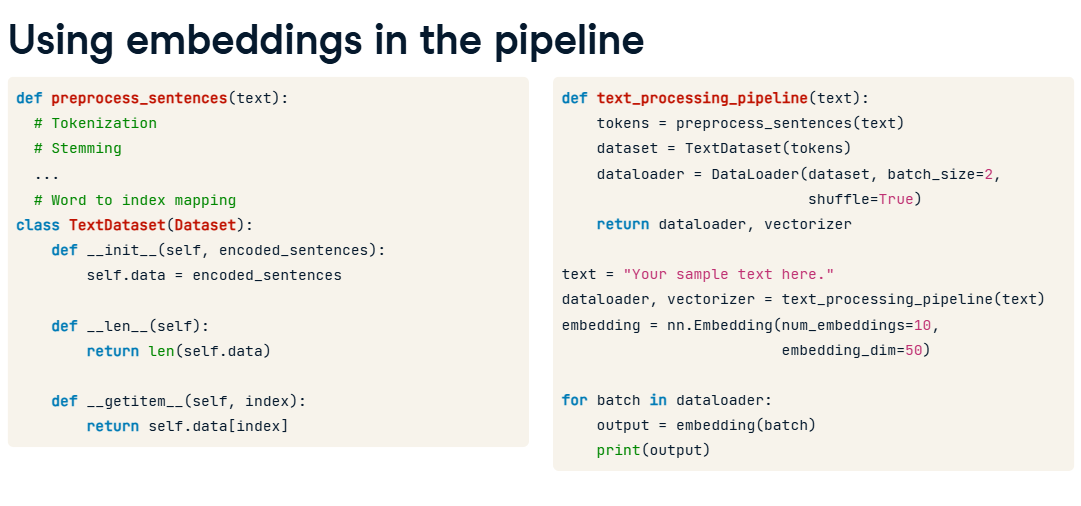

MODELO RNN :

In [ ]:
# Complete the RNN class
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Initialize the model
rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# Train the model for ten epochs and zero the gradients
for epoch in range(10):
    optimizer.zero_grad()
    outputs = rnn_model(X_train_seq)
    loss = criterion(outputs, y_train_seq)
    loss.backward()
    optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

RED LSTM

In [ ]:
# Initialize the LSTM and the output layer with parameters
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Initialize model with required parameters
lstm_model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.01)

# Train the model by passing the correct parameters and zeroing the gradient
for epoch in range(10):
    optimizer.zero_grad()
    outputs = lstm_model(X_train_seq)
    loss = criterion(outputs, y_train_seq)
    loss.backward()
    optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')